In [10]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

Use the forge dataset which has 2 features for binary classification

X.shape: (26, 2)


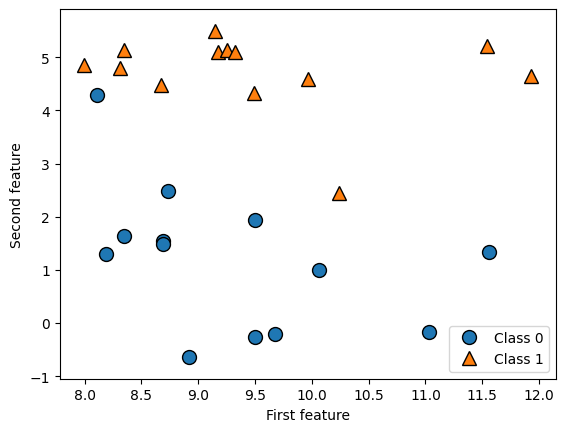

In [11]:
 # generate dataset
X, y = mglearn.datasets.make_forge()
 # plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

To  illustrate regression algoorithms,we use a synthetic wave dataset which has a single input feature and continous response

Text(0, 0.5, 'Target')

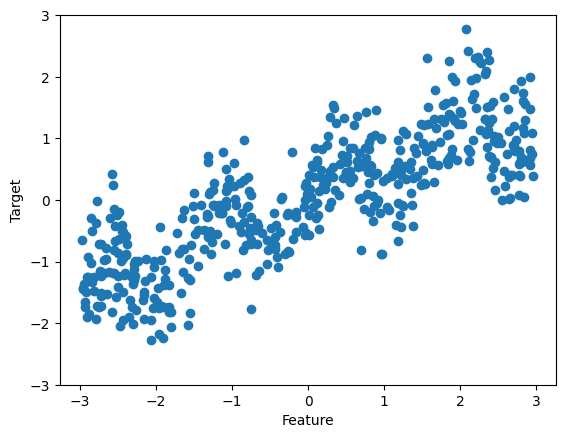

In [12]:
x,y=mglearn.datasets.make_wave(n_samples=500)
plt.plot(x,y,'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target')

These smaller datasets are complemented by 2 larger ones from sklearn

In [13]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [17]:
print(cancer.data.shape)
print('Sample counts per class:\n{}'.format({n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}))
print('Feature names: \n{}'.format(cancer.feature_names))

(569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Also using a real world regression dataset to predict the median value of homes in several Boston neighborhoods.

In [20]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
print('Data shape: \n{}'.format(diabetes.data.shape))

Data shape: 
(442, 10)


k-Nearest Neighbors

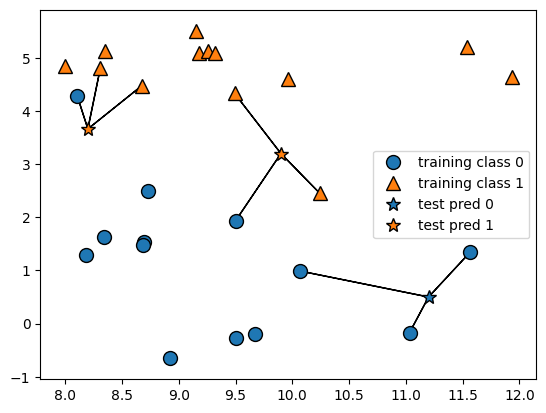

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Applying KNN using Sklearn

In [24]:
import mglearn.datasets
from sklearn.model_selection import train_test_split
x,y=mglearn.datasets.make_forge()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

To make predictions on the test data, we call the predict method. For each data point
 in the test set, this computes its nearest neighbors in the training set and finds the
 most common class among these

In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
print('Test set predictions: {}'.format(clf.predict(x_test)))

Test set predictions: [1 0 1 0 1 0 0]


 To evaluate how well our model generalizes, we can call the score method with the
 test data together with the test labels

In [27]:
print("Test set accuracy: {:.2f}".format(clf.score(x_test, y_test)))

Test set accuracy: 0.86


To visualize the decision boundary where the algorithm splits the two classes

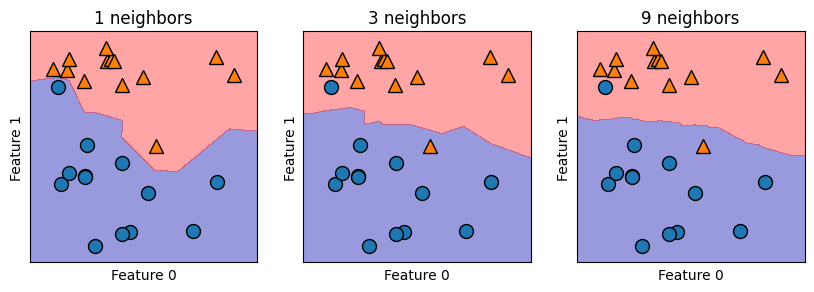

In [28]:
fig,axes=plt.subplots(1,3,figsize=(10,3))
for n_neighbors,ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(clf,x,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)
    ax.set_title('{} neighbors'.format(n_neighbors))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')


As can be noted from the above,using fewer neighbors can correspond to higher model complexity and the more neighbors we use is the smoother the decision boundary gets.

Applying this to a real world dataset: